# 12. Which cities are the worst with regard to access to train facilities? You can do this by calculating the travel distance, travel time, … Would you recommend based on this, and the visualization in Q5, to create some new routes?

In [2]:
import src.data_processing.data as data
import matplotlib.pyplot as plt

In [3]:
facilities = data.facilities

The 10 stations with the least number of facilities

In [4]:
facilities['count'] = facilities.loc[:,['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].sum(axis=1)
facilities[facilities["count"] == 0][["name" , "count"]]

name  count
56           bambrugge    0.0
61       bastogne-nord    0.0
62        bastogne-sud    0.0
68             beignée    0.0
88              bleret    0.0
103       bracquegnies    0.0
125         callenelle    0.0
126    cambron-casteau    0.0
129         carlsbourg    0.0
157            de hoek    0.0
198          erpe-mere    0.0
219    flemalle-grande    0.0
225             florée    0.0
227           forchies    0.0
231        franchimont    0.0
271     ham-sur-sambre    0.0
281        haute-flône    0.0
307           holleken    0.0
324  jemeppe-sur-meuse    0.0
361              leman    0.0
414    marchienne-zone    0.0
511    pont-de-seraing    0.0
555           sclessin    0.0
623         vijfhuizen    0.0
665             zellik    0.0

In [5]:
stations = data.stations
stations["name"] = stations["name"].str.lower()
facilities = facilities.merge(stations, on ="name")
facilities

URI_x              name                    street   zip  \
0    008895000             aalst           Stationsplein 9  9300   
1    008895125  aalst-kerrebroek                  Ledebaan  9300   
2    008891140            aalter           Stationsplein 2  9880   
3    008833209          aarschot               Statieplein  3200   
4    008892288           aarsele       Hogenhovenstraat Zn  8700   
..         ...               ...                       ...   ...   
550  008832250            zolder        Stationsstraat Z/n  3550   
551  008832334          zonhoven            Engstegenseweg  3520   
552  008895208          zottegem          Stationsplein 12  9620   
553  008894821       zwijndrecht                Fortlaan 1  2070   
554  008883212       écaussinnes  Avenue De La Déportation  7190   

                 city  ticket_vending_machine  luggage_lockers  free_parking  \
0               Aalst                     1.0              0.0           1.0   
1               Aalst                     0.0              0.0           1.0   
2              Aalter                     1.0              0.0           1.0   
3            Aarschot                     1.0              0.0           1.0   
4             Aarsele                     1.0              0.0           0.0   
..                ...                     ...              ...           ...   
550  Heusden - Zolder                     1.0              0.0           1.0   
551          Zonhoven                     1.0              0.0           1.0   
552          Zottegem                     1.0              0.0           1.0   
553       Zwijndrecht                     1.0              0.0           1.0   
554       Ecaussinnes                     1.0              0.0           1.0   

     taxi  bicycle_spots  ...  sales_close_saturday  sales_open_sunday  \
0     1.0            1.0  ...       0 days 20:00:00    0 days 06:00:00   
1     0.0            0.0  ...       0 days 00:00:00    0 days 00:00:00   
2     0.0            1.0  ...       0 days 15:00:00    0 days 07:45:00   
3     0.0            1.0  ...       0 days 20:00:00    0 days 07:00:00   
4     0.0            0.0  ...       0 days 00:00:00    0 days 00:00:00   
..    ...            ...  ...                   ...                ...   
550   0.0            0.0  ...       0 days 00:00:00    0 days 00:00:00   
551   0.0            0.0  ...       0 days 00:00:00    0 days 00:00:00   
552   0.0            1.0  ...       0 days 14:30:00    0 days 07:15:00   
553   0.0            1.0  ...       0 days 00:00:00    0 days 00:00:00   
554   0.0            1.0  ...       0 days 00:00:00    0 days 00:00:00   

     sales_close_sunday  count      URI_y  country-code  longitude   latitude  \
0       0 days 20:00:00   12.0  008895000            be   4.039653  50.942813   
1       0 days 00:00:00    1.0  008895125            be   4.024407  50.948377   
2       0 days 15:00:00    7.0  008891140            be   3.447848  51.092295   
3       0 days 14:15:00    9.0  008833209            be   4.824043  50.984406   
4       0 days 00:00:00    1.0  008892288            be   3.418363  50.984460   
..                  ...    ...        ...           ...        ...        ...   
550     0 days 00:00:00    3.0  008832250            be   5.329900  51.033548   
551     0 days 00:00:00    3.0  008832334            be   5.348815  50.989557   
552     0 days 14:30:00    8.0  008895208            be   3.814410  50.869102   
553     0 days 00:00:00    3.0  008894821            be   4.329780  51.214108   
554     0 days 00:00:00    4.0  008883212            be   4.156639  50.562390   

     avg_stop_times  official_transfer_time  
0        157.425373                   300.0  
1          7.731343                   300.0  
2        188.276119                   240.0  
3        171.664179                   240.0  
4         37.365672                   300.0  
..              ...                     ...  
550       30.910448                   300.0  
5

Plot the station that have no facilities: mostly in wallonie

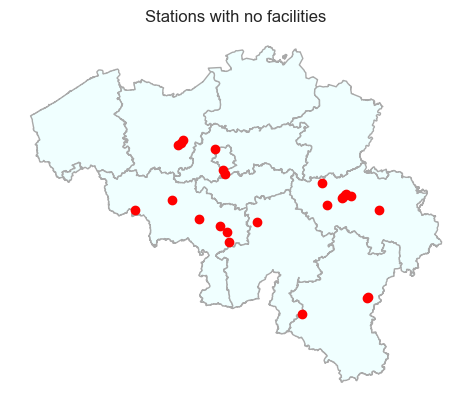

In [6]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(facilities[facilities["count"] == 0]["longitude"], facilities[facilities["count"] == 0]["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Stations with no facilities")
plt.show()


In [7]:
facilities["count"].describe()

count    555.000000
mean       4.059459
std        3.128718
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: count, dtype: float64

<AxesSubplot: ylabel='Frequency'>

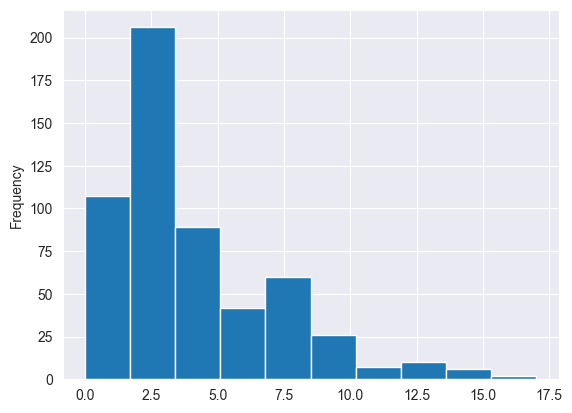

In [8]:
facilities["count"].plot.hist(bins = 10)

In [9]:
stations_distance = data.stations_distance
stations_distance["stationfrom"]= stations_distance["stationfrom"].str.lower()
stations_distance["stationto_n"] = stations_distance["stationto_n"].str.lower()
stations_distance.sort_values(by="length", ascending = False)

stationfrom stationto_i   stationto_n     length  \
835            ans         715        leuven  66.219913   
832         leuven          31           ans  66.219913   
552     brux-ouest         455     gent-st-p  53.737634   
1025     gent-st-p         223    brux-ouest  53.737634   
440      gent-st-p         415   forest-midi  52.603059   
...            ...         ...           ...        ...   
1324   jemeppe-s-s         515  ham-s-sambre   0.774603   
860     geronstere        1097           spa   0.758586   
201            spa         459    geronstere   0.758586   
84    brux-schuman         218   bruxell-lux   0.676258   
1288   bruxell-lux         227  brux-schuman   0.676258   

                                               geometry  
835   LINESTRING (4.71621 50.88137, 4.71618 50.88128...  
832   LINESTRING (4.71621 50.88137, 4.71618 50.88128...  
552   LINESTRING (4.32282 50.85206, 4.32251 50.85146...  
1025  LINESTRING (4.32282 50.85206, 4.32251 50.85146...  
440   LINESTRING (4.31035 50.81007, 4.30981 50.81062...  
...                                                 ...  
1324  LINESTRING (4.67291 50.45281, 4.67257 50.45283...  
860   LINESTRING (5.85578 50.49024, 5.85599 50.49028...  
201   LINESTRING (5.85578 50.49024, 5.85599 50.49028...  
84    LINESTRING (4.38002 50.84285, 4.37937 50.84263...  
1288  LINESTRING (4.38002 50.84285, 4.37937 50.84263...  

[1380 rows x 5 columns]

In [10]:
stations_distance["total_length"] = stations_distance.groupby("stationfrom")["length"].transform("sum")
stations_distance["count"] = stations_distance.groupby("stationfrom")["stationfrom"].transform("count")
# stations_distance = stations_distance.groupby("stationfrom").sum().reset_index()[["stationfrom", "length", "count"]].rename({"stationfrom": "station"}, axis=1)
stations_distance["length/count"] = stations_distance["total_length"] / stations_distance["count"]
stations_distance

stationfrom stationto_i  stationto_n     length  \
0          luttre         286  courc-motte   5.513544   
1          thulin         501       hainin   1.567201   
2         hasselt          19        alken   6.494286   
3            mery         579         hony   1.477955   
4         ezemaal        1146       tienen   6.307973   
...           ...         ...          ...        ...   
1375  forest-midi         455    gent-st-p  52.603059   
1376    etterbeek        1761        delta   1.534245   
1377     bissegem         649     kortrijk   3.494127   
1378        engis         530  haute-flone   6.000201   
1379   schaerbeek         325       diegem   6.346232   

                                               geometry  total_length  count  \
0     LINESTRING (4.38425 50.50601, 4.38444 50.50588...     11.716203      3   
1     LINESTRING (3.76679 50.42803, 3.76628 50.42791...      6.082822      2   
2     LINESTRING (5.29175 50.88640, 5.31405 50.89927...     37.297193      5   
3     LINESTRING (5.58707 50.54825, 5.58713 50.54815...      4.600313      2   
4     LINESTRING (4.92564 50.80793, 4.93014 50.80467...      9.546610      2   
...                                                 ...           ...    ...   
1375  LINESTRING (4.31035 50.81007, 4.30981 50.81062...    139.499513      7   
1376  LINESTRING (4.40436 50.81920, 4.40371 50.81817...      8.203539      5   
1377  LINESTRING (3.22409 50.82579, 3.23775 50.83018...     21.324587      3   
1378  LINESTRING (5.40222 50.58266, 5.40111 50.58229...     10.076804      2   
1379  LINESTRING (4.37843 50.87869, 4.37800 50.87899...     68.989866     11   

      length/count  
0         3.905401  
1         3.041411  
2         7.459439  
3         2.300157  
4         4.773305  
...            ...  
1375     19.928502  
1376      1.640708  
1377      7.108196  
1378      5.038402  
1379      6.271806  

[1380 rows x 8 columns]

In [11]:
stations_distance = stations_distance[["stationfrom", "total_length","count",  "length/count"]].drop_duplicates().rename(columns = {"stationfrom" : "station", "count" : "neighbours_count"})
stations_distance

station  total_length  neighbours_count  length/count
0        luttre     11.716203                 3      3.905401
1        thulin      6.082822                 2      3.041411
2       hasselt     37.297193                 5      7.459439
3          mery      4.600313                 2      2.300157
4       ezemaal      9.546610                 2      4.773305
...         ...           ...               ...           ...
1213     natoye      7.889648                 2      3.944824
1226   de panne      3.669362                 1      3.669362
1316     hamont      8.684387                 1      8.684387
1317   oostende     21.897862                 1     21.897862
1352  poperinge     10.134972                 1     10.134972

[557 rows x 4 columns]

The 10 stations with the least neighbouring stations, these are the least accessible stations:

In [12]:
stations_distance[["station", "neighbours_count"]].sort_values(by = "neighbours_count", ascending = True).head(10)

station  neighbours_count
1352    poperinge                 1
1054        quevy                 1
1317     oostende                 1
699   erquelinnes                 1
860    geronstere                 1
804        binche                 1
35          essen                 1
66         knokke                 1
944        renaix                 1
213      turnhout                 1

<AxesSubplot: ylabel='Frequency'>

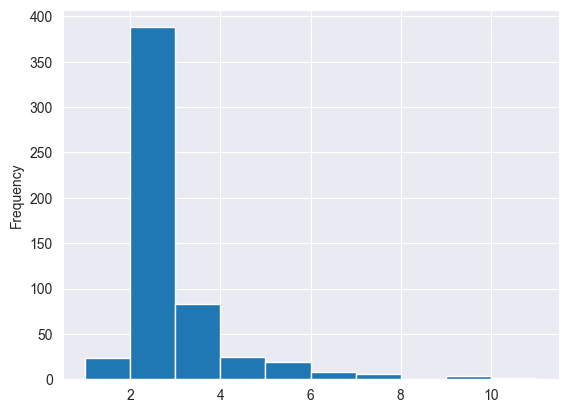

In [13]:
stations_distance["neighbours_count"].plot.hist()

The 10 stations with the least distance to neighbouring stations:

In [14]:
stations_distance[["station", "total_length"]].sort_values(by = "total_length", ascending = True).head(10)

station  total_length
860    geronstere      0.758586
699   erquelinnes      1.331714
66         knokke      1.564377
114  brux-central      1.622525
527  brux-congres      1.775904
877  bruxell-chap      1.829294
140         leman      2.116573
822  uccle-stalle      2.186602
581  ham-s-sambre      2.327427
181       germoir      2.330925

<AxesSubplot: ylabel='Frequency'>

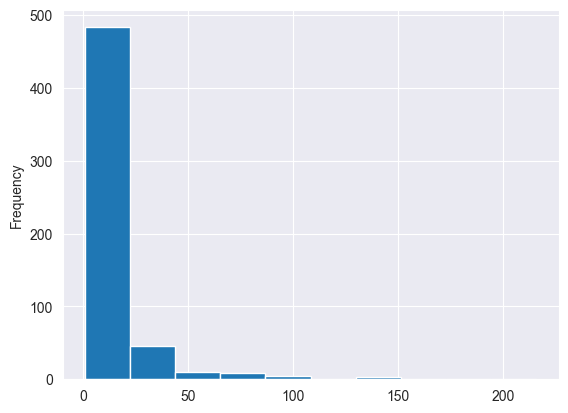

In [15]:
stations_distance["total_length"].plot.hist()

The  10 stations with the  least distance to neighbouring stations, divided by the number of neighbouring stations (average length)

In [16]:
stations_distance[["station", "length/count"]].sort_values(by = "length/count", ascending = True).head(10)

station  length/count
860    geronstere      0.758586
114  brux-central      0.811262
527  brux-congres      0.887952
877  bruxell-chap      0.914647
140         leman      1.058286
822  uccle-stalle      1.093301
581  ham-s-sambre      1.163714
181       germoir      1.165463
883         theux      1.182352
842       arcades      1.185494

<AxesSubplot: ylabel='Frequency'>

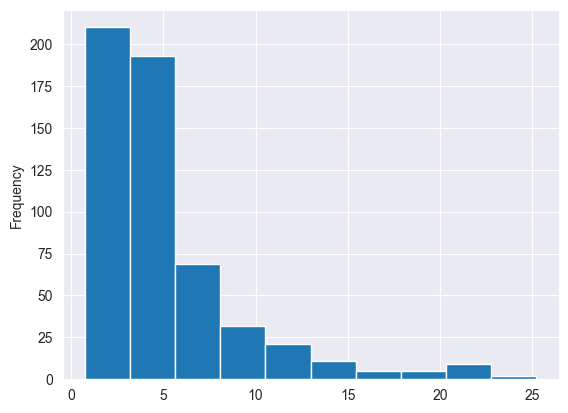

In [17]:
stations_distance["length/count"].plot.hist()

Are the number of neighbors ( how isolated the station is ), correlated with the satisfaction score?

In [18]:
satisfaction = data.satisfaction
satisfaction = stations_distance.merge(satisfaction, on ="station")
satisfaction

station  total_length  neighbours_count  length/count  Unnamed: 0  \
0       luttre     11.716203                 3      3.905401           6   
1       thulin      6.082822                 2      3.041411         374   
2      hasselt     37.297193                 5      7.459439         245   
3      ezemaal      9.546610                 2      4.773305         329   
4        gouvy     11.424757                 1     11.424757         618   
..         ...           ...               ...           ...         ...   
403     natoye      7.889648                 2      3.944824         196   
404   de panne      3.669362                 1      3.669362          31   
405     hamont      8.684387                 1      8.684387         605   
406   oostende     21.897862                 1     21.897862         238   
407  poperinge     10.134972                 1     10.134972         577   

     Avg Satisfaction  
0               34.73  
1               23.62  
2               59.21  
3               65.13  
4               67.90  
..                ...  
403             41.15  
404             74.34  
405             21.47  
406             56.84  
407             61.95  

[408 rows x 6 columns]

Slight positive correlation

In [19]:
satisfaction.describe()

total_length  neighbours_count  length/count  Unnamed: 0  \
count    408.000000        408.000000    408.000000  408.000000   
mean      14.109433          2.392157      5.323630  318.796569   
std       17.692883          1.024581      3.978683  176.919408   
min        1.331714          1.000000      1.058286    1.000000   
25%        5.776180          2.000000      2.856195  169.500000   
50%        8.557172          2.000000      3.988606  321.000000   
75%       15.194207          2.000000      6.568918  474.250000   
max      182.045935          9.000000     25.194809  618.000000   

       Avg Satisfaction  
count        408.000000  
mean          47.765784  
std           16.395969  
min            2.030000  
25%           36.965000  
50%           48.640000  
75%           59.432500  
max           93.980000

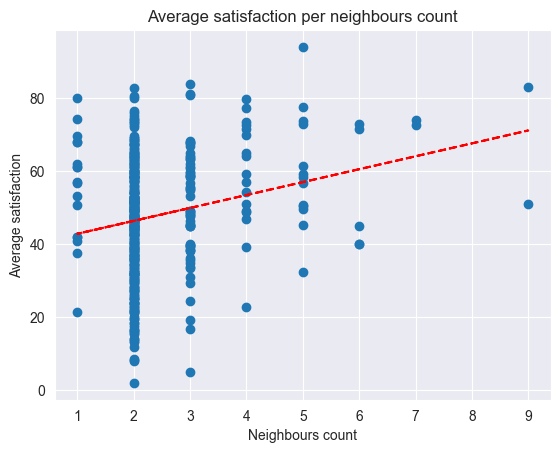

In [20]:
import numpy as np
sfig, ax = plt.subplots()
ax.scatter(satisfaction["neighbours_count"], satisfaction["Avg Satisfaction"])
ax.set_xlabel("Neighbours count")
ax.set_ylabel("Average satisfaction")
ax.set_title("Average satisfaction per neighbours count")
z = np.polyfit(satisfaction["neighbours_count"], satisfaction["Avg Satisfaction"], 1)
p = np.poly1d(z)
plt.plot(satisfaction["neighbours_count"],p(satisfaction["neighbours_count"]),"r--")
plt.show()

Check which stations only have 1 neighbor

In [21]:
stations = data.stations
stations["name"] = stations["name"].str.lower()

stations_1_neighbor = satisfaction[satisfaction["neighbours_count"] == 1]
stations_1_neighbor = stations_1_neighbor.merge(stations,left_on = "station" ,right_on ="name" )
stations_1_neighbor

station  total_length  neighbours_count  length/count  Unnamed: 0  \
0          gouvy     11.424757                 1     11.424757         618   
1      quievrain      4.515621                 1      4.515621         304   
2          essen      4.005290                 1      4.005290         305   
3         knokke      1.564377                 1      1.564377         102   
4       turnhout      9.707774                 1      9.707774         361   
5          eeklo      4.032409                 1      4.032409         598   
6   blankenberge     11.741598                 1     11.741598         248   
7           genk      6.568783                 1      6.568783          93   
8         couvin      5.248958                 1      5.248958          91   
9    erquelinnes      1.331714                 1      1.331714         278   
10        binche      3.817105                 1      3.817105          27   
11         eupen      5.922867                 1      5.922867         190   
12         quevy      5.737522                 1      5.737522         358   
13      de panne      3.669362                 1      3.669362          31   
14        hamont      8.684387                 1      8.684387         605   
15      oostende     21.897862                 1     21.897862         238   
16     poperinge     10.134972                 1     10.134972         577   

    Avg Satisfaction        URI          name country-code  longitude  \
0              67.90  008845005         gouvy           be   5.953906   
1              42.04  008884335     quievrain           be   3.686080   
2              61.24  008821402         essen           be   4.451314   
3              80.04  008891660        knokke           be   3.285188   
4              61.04  008821907      turnhout           be   4.937415   
5              37.70  008893708         eeklo           be   3.574515   
6              69.69  008891405  blankenberge           be   3.133864   
7              53.09  008831765          genk           be   5.497685   
8              57.09  008875127        couvin           be   4.491702   
9              50.61  008871605   erquelinnes           be   4.113562   
10             41.84  008882362        binche           be   4.172451   
11             67.97  008844628         eupen           be   6.037110   
12             41.00  008881505         quevy           be   3.909489   
13             74.34  008892338      de panne           be   2.601963   
14             21.47  008832664        hamont           be   5.543279   
15             56.84  008891702      oostende           be   2.925809   
16             61.95  008896735     poperinge           be   2.736343   

     latitude  avg_stop_times  official_transfer_time  
0   50.189409       27.761194                   180.0  
1   50.410103       32.768657                   300.0  
2   51.462767       82.380597                   240.0  
3   51.339894       38.910448                   300.0  
4   51.322032       56.082090                   300.0  
5   51.181333       33.119403                   300.0  
6   51.312432       39.365672                   300.0  
7   50.967057       42.141791                   300.0  
8   50.056324       31.649254                   300.0  
9   50.304192       32.641791                   300.0  
10  50.408764       36.164179                   300.0  
11  50.635157       33.141791                   300.0  
12  50.341534       27.716418                   300.0  
13  51.077400       37.156716                   300.0  
14  51.246424       32.783582                   300.0  
15  51.228212      116.828358                   300.0  
16  50.854449       41.544776                   300.0

The most isolated stations, stations that only have 1 neighbor station,  are located at the border. This is logical.

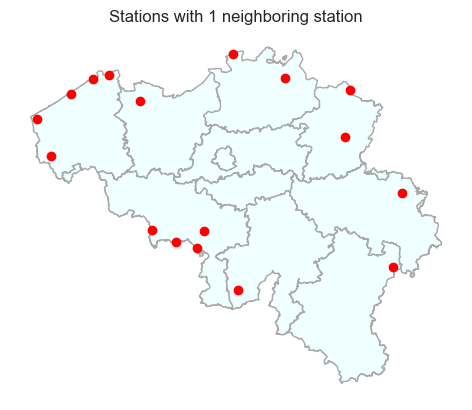

In [22]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(stations_1_neighbor["longitude"], stations_1_neighbor["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Stations with 1 neighboring station" )
plt.show()

Calculating the average travel time to a station

In [101]:
trips

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
0               0        2020-09-22            11      ICE         SNCB/NMBS   
1               1        2020-09-22            11      ICE         SNCB/NMBS   
2               2        2020-09-22            11      ICE         SNCB/NMBS   
3               3        2020-09-22            11      ICE         SNCB/NMBS   
4               4        2020-09-22            11      ICE         SNCB/NMBS   
...           ...               ...           ...      ...               ...   
72524       72524        2020-09-24         17200    EXTRA         SNCB/NMBS   
72525       72525        2020-09-24         17200    EXTRA         SNCB/NMBS   
72526       72526        2020-09-24         17200    EXTRA         SNCB/NMBS   
72527       72527        2020-09-24         17301    EXTRA         SNCB/NMBS   
72528       72528        2020-09-24         17301    EXTRA         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
0                      36N  2020-09-22 06:31:22    2020-09-22 06:33:27   
1                      36N  2020-09-22 06:36:23    2020-09-22 06:36:23   
2                      36N  2020-09-22 06:37:44    2020-09-22 06:37:44   
3                      36N  2020-09-22 06:38:39    2020-09-22 06:38:39   
4                      36N  2020-09-22 06:39:47    2020-09-22 06:39:47   
...                    ...                  ...                    ...   
72524                  130  2020-09-24 17:20:23    2020-09-24 17:20:23   
72525                  154  2020-09-24 17:27:14    2020-09-24 17:27:14   
72526                  NaN  2020-09-24 17:33:22                    NaT   
72527                  140  2020-09-24 18:57:01    2020-09-24 18:58:04   
72528                  140  2020-09-24 19:29:57    2020-09-24 19:29:57   

      Time of planned arrival Time of planned departure  \
0         2020-09-22 06:31:00       2020-09-22 06:33:00   
1         2020-09-22 06:36:00       2020-09-22 06:36:00   
2         2020-09-22 06:37:00       2020-09-22 06:37:00   
3         2020-09-22 06:38:00       2020-09-22 06:38:00   
4         2020-09-22 06:40:00       2020-09-22 06:40:00   
...                       ...                       ...   
72524     2020-09-24 17:05:00       2020-09-24 17:05:00   
72525     2020-09-24 17:17:00       2020-09-24 17:17:00   
72526     2020-09-24 17:20:00                       NaT   
72527     2020-09-24 18:55:00       2020-09-24 18:56:00   
72528     2020-09-24 19:26:00       2020-09-24 19:26:00   

                          Direction of relation              Name of the stop  \
0      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF  brussel-noord/bruxelles-nord   
1      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF         schaarbeek/schaerbeek   
2      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF          haren-sud/haren-zuid   
3      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF                        diegem   
4      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF                    kortenberg   
...                                         ...                           ...   
72524                                       NaN                         ronet   
72525                                       NaN                namur-herbatte   
72526                                       NaN                        jambes   
72527                                       NaN               charleroi-ouest   
72528                                       NaN                          faux   

      Railway of arrival Date of planned arrival Date of planned departure  \
0                    0/1              2020-09-22                2020-09-22   
1                    36N              2020-09-22                2020-09-22   
2                    36N              2020-09-22                2020-09-22   
3                    36N              2020-09-22                2020-09-22   
4                    36N              2020-09-22                2020-09-22   
...    

In [114]:
trips = data.full_trips
trips = trips.sort_values(by = ["Train number", "Time of planned departure"])
trips["Planned_travel_time"] = (trips["Time of planned arrival"] - trips["Time of planned departure"].shift(1)).dt.seconds
trips["Real_travel_time"] = (trips["Time of real arrival"] - trips["Time of real departure"].shift(1)).dt.seconds
trips.drop(trips[trips["Planned_travel_time"] == 0].index, inplace = True)
trips.dropna(subset = ["Planned_travel_time"], inplace = True)
trips.drop(trips[trips["Planned_travel_time"] > 3600].index, inplace = True)
trips.drop(trips[trips["Real_travel_time"] == 0].index, inplace = True)
trips.dropna(subset = ["Real_travel_time"], inplace = True)
trips.drop(trips[trips["Real_travel_time"] > 3600].index, inplace = True)
trips

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
13575       13575        2020-09-20            10      ICE         SNCB/NMBS   
14842       14842        2020-09-20            10      ICE         SNCB/NMBS   
14845       14845        2020-09-20            10      ICE         SNCB/NMBS   
14848       14848        2020-09-20            10      ICE         SNCB/NMBS   
14851       14851        2020-09-20            10      ICE         SNCB/NMBS   
...           ...               ...           ...      ...               ...   
2896         2896        2020-09-23         19974  IC 19-2         SNCB/NMBS   
41063       41063        2020-09-24         19974  IC 19-2         SNCB/NMBS   
19554       19554        2020-09-22         19975  IC 19-2         SNCB/NMBS   
6358         6358        2020-09-20         19976  IC 19-2         SNCB/NMBS   
23166       23166        2020-09-26         19979  IC 19-2         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
13575                   37  2020-09-20 20:47:50    2020-09-20 20:47:50   
14842                   37  2020-09-20 20:48:43    2020-09-20 20:48:43   
14845                   36  2020-09-20 20:51:05    2020-09-20 20:52:54   
14848                    2  2020-09-20 20:56:54    2020-09-20 20:56:54   
14851                  36N  2020-09-20 21:15:00    2020-09-20 21:15:00   
...                    ...                  ...                    ...   
2896                    94  2020-09-23 21:26:09    2020-09-23 21:26:30   
41063                   94  2020-09-24 21:25:47    2020-09-24 21:25:50   
19554                  NaN  2020-09-22 22:38:39                    NaT   
6358                    94  2020-09-20 21:52:36    2020-09-20 21:53:06   
23166                  NaN  2020-09-26 07:22:03                    NaT   

      Time of planned arrival Time of planned departure  \
13575     2020-09-20 20:40:00       2020-09-20 20:40:00   
14842     2020-09-20 20:41:00       2020-09-20 20:41:00   
14845     2020-09-20 20:44:00       2020-09-20 20:46:00   
14848     2020-09-20 20:51:00       2020-09-20 20:51:00   
14851     2020-09-20 21:11:00       2020-09-20 21:11:00   
...                       ...                       ...   
2896      2020-09-23 21:26:00       2020-09-23 21:26:00   
41063     2020-09-24 21:26:00       2020-09-24 21:26:00   
19554     2020-09-22 22:38:00                       NaT   
6358      2020-09-20 21:50:00       2020-09-20 21:50:00   
23166     2020-09-26 07:21:00                       NaT   

                          Direction of relation  Name of the stop  \
13575  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID            chênée   
14842  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID           angleur   
14845  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID  liège-guillemins   
14848  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID               ans   
14851  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID            leuven   
...                                         ...               ...   
2896         IC 19-2: TOURNAI -> LILLE FLANDRES         froyennes   
41063        IC 19-2: TOURNAI -> LILLE FLANDRES         froyennes   
19554        IC 19-2: LILLE FLANDRES -> TOURNAI           tournai   
6358         IC 19-2: TOURNAI -> LILLE FLANDRES         froyennes   
23166        IC 19-2: LILLE FLANDRES -> TOURNAI           tournai   

      Railway of arrival Date of planned arrival Date of planned departure  \
13575                  3              2020-09-20                2020-09-20   
14842                 37              2020-09-20                2020-09-20   
14845                 37              2020-09-20                2020-09-20   
14848                 36              2020-09-20                2020-09-20   
14851                  2              2020-09-20                2020-09-20   
...                  ...                     ...                       ...   
2896                  94              2020-09-23                2020-09-2

In [115]:
train_numbers = trips["Train number"].unique()
#routes is a dictionary that takes the train number as key and returns all the subsequent stop this train has passed through
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= [ "Time of planned departure"])

In [116]:
routes.get(10)

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
13575       13575        2020-09-20            10      ICE         SNCB/NMBS   
14842       14842        2020-09-20            10      ICE         SNCB/NMBS   
14845       14845        2020-09-20            10      ICE         SNCB/NMBS   
14848       14848        2020-09-20            10      ICE         SNCB/NMBS   
14851       14851        2020-09-20            10      ICE         SNCB/NMBS   
...           ...               ...           ...      ...               ...   
60             60        2020-09-26            10      ICE         SNCB/NMBS   
62             62        2020-09-26            10      ICE         SNCB/NMBS   
762           762        2020-09-26            10      ICE         SNCB/NMBS   
765           765        2020-09-26            10      ICE         SNCB/NMBS   
35967       35967        2020-09-22            10      ICE         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
13575                   37  2020-09-20 20:47:50    2020-09-20 20:47:50   
14842                   37  2020-09-20 20:48:43    2020-09-20 20:48:43   
14845                   36  2020-09-20 20:51:05    2020-09-20 20:52:54   
14848                    2  2020-09-20 20:56:54    2020-09-20 20:56:54   
14851                  36N  2020-09-20 21:15:00    2020-09-20 21:15:00   
...                    ...                  ...                    ...   
60                     36N  2020-09-26 21:20:19    2020-09-26 21:20:19   
62                     0/2  2020-09-26 21:23:09    2020-09-26 21:26:41   
762                    0/2  2020-09-26 21:28:36    2020-09-26 21:28:36   
765                    0/2  2020-09-26 21:29:40    2020-09-26 21:29:40   
35967                  NaN  2020-09-22 21:34:32                    NaT   

      Time of planned arrival Time of planned departure  \
13575     2020-09-20 20:40:00       2020-09-20 20:40:00   
14842     2020-09-20 20:41:00       2020-09-20 20:41:00   
14845     2020-09-20 20:44:00       2020-09-20 20:46:00   
14848     2020-09-20 20:51:00       2020-09-20 20:51:00   
14851     2020-09-20 21:11:00       2020-09-20 21:11:00   
...                       ...                       ...   
60        2020-09-26 21:23:00       2020-09-26 21:23:00   
62        2020-09-26 21:26:00       2020-09-26 21:28:00   
762       2020-09-26 21:30:00       2020-09-26 21:30:00   
765       2020-09-26 21:31:00       2020-09-26 21:31:00   
35967     2020-09-22 21:35:00                       NaT   

                          Direction of relation  \
13575  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
14842  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
14845  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
14848  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
14851  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
...                                         ...   
60     ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
62     ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
762    ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
765    ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   
35967  ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID   

                         Name of the stop Railway of arrival  \
13575                              chênée                  3   
14842                             angleur                 37   
14845                    liège-guillemins                 37   
14848                                 ans                 36   
14851                              leuven                  2   
...                                   ...                ...   
60                  schaarbeek/schaerbeek                36N   
62           brussel-noord/bruxelles-nord                36N   
762     brussel-congres/bruxelles-congrès                0/2   
765    brussel-centraal/bruxelles-central                0/2   
35967         brussel-zuid/bruxelles-midi                0/2   

      Date of planned arrival Date of planned departure Date of re

In [113]:
# for train_number in train_numbers:
#         routes.get(train_number)["Difference"] = (routes.get(train_number)["Time of planned arrival"] - routes.get(train_number)["Time of planned departure"].shift(1)).dt.seconds
#


In [94]:
# for train_number in train_numbers:
#     routes.get(train_number).loc[routes.get(train_number)["Difference"] > 7200, "Difference"] = np.nan
#     routes.get(train_number)["Difference"] = routes.get(train_number)["Difference"].fillna(0)
#     routes.get(train_number).drop(routes.get(train_number)[routes.get(train_number)["Difference"] == 0].index, inplace = True)


In [129]:
import pandas as pd
mean_difference_real = pd.DataFrame()
for train_number in train_numbers:
    mean_difference_real = mean_difference_real.append(routes.get(train_number).groupby("Name of the stop")["Real_travel_time"].mean().reset_index())
mean_difference_planned = pd.DataFrame()
for train_number in train_numbers:
    mean_difference_planned = mean_difference_planned.append(routes.get(train_number).groupby("Name of the stop")["Planned_travel_time"].mean().reset_index())

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_81409/2148271913.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_difference_real = mean_difference_real.append(routes.get(train_number).groupby("Name of the stop")["Real_travel_time"].mean().reset_index())
/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_81409/2148271913.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_difference_real = mean_difference_real.append(routes.get(train_number).groupby("Name of the stop")["Real_travel_time"].mean().reset_index())
/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_81409/2148271913.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_difference_real = mean_difference_real.append(routes

In [130]:
mean_difference_real = mean_difference_real.groupby("Name of the stop")["Real_travel_time"].mean().reset_index()
mean_difference_real["Real_travel_time"] = mean_difference_real["Real_travel_time"]/60

mean_difference_planned = mean_difference_planned.groupby("Name of the stop")["Planned_travel_time"].mean().reset_index()
mean_difference_planned["Planned_travel_time"] = mean_difference_planned["Planned_travel_time"]/60


In [127]:
mean_difference_real.describe()

Real_travel_time
count        620.000000
mean           3.989479
std            2.972756
min            0.837500
25%            2.302778
50%            3.190633
75%            4.949476
max           41.656944

In [131]:
mean_difference_planned.describe()

Planned_travel_time
count           620.000000
mean              3.991469
std               2.681061
min               0.714583
25%               2.441485
50%               3.265315
75%               4.905308
max              37.833333

For each train stop, we now know the average travel time to that stop.

In [135]:
mean_difference_real.sort_values(by = "Real_travel_time").head(10)

Name of the stop  Real_travel_time
111           charleroi-faisceau a          0.837500
292             jemeppe-sur-sambre          1.028040
497            schaarbeek-josaphat          1.037667
232                 ham-sur-sambre          1.087476
230                 halle-goederen          1.124437
224               haacht-wijkspoor          1.146528
562  ukkel-kalevoet/uccle-calevoet          1.179973
335                leuven-bundel m          1.216667
485                ronet-formation          1.350000
490            saint-denis-bovesse          1.350645

In [150]:
mean_difference_real = mean_difference_real.merge(stations, left_on ="Name of the stop", right_on = "name")
mean_difference_real

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_81409/1185236461.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'official_transfer_time_x', 'name_x', 'longitude_x', 'country-code_x', 'avg_stop_times_x', 'latitude_x', 'URI_x'} in the result is deprecated and will raise a MergeError in a future version.
  mean_difference_planned = mean_difference_planned.merge(stations, left_on ="Name of the stop", right_on = "name")


Name of the stop  Real_travel_time      URI_x            name_x  \
0               aalst          6.381033  008895000             aalst   
1    aalst-kerrebroek          3.469594  008895125  aalst-kerrebroek   
2              aalter          2.608499  008891140            aalter   
3            aarschot          4.409830  008833209          aarschot   
4             aarsele          4.628193  008892288           aarsele   
..                ...               ...        ...               ...   
549            zolder          3.076280  008832250            zolder   
550          zonhoven          7.313551  008832334          zonhoven   
551          zottegem          5.164172  008895208          zottegem   
552       zwijndrecht          4.587436  008894821       zwijndrecht   
553       écaussinnes          4.789765  008883212       écaussinnes   

    country-code_x  longitude_x  latitude_x  avg_stop_times_x  \
0               be     4.039653   50.942813        157.425373   
1               be     4.024407   50.948377          7.731343   
2               be     3.447848   51.092295        188.276119   
3               be     4.824043   50.984406        171.664179   
4               be     3.418363   50.984460         37.365672   
..             ...          ...         ...               ...   
549             be     5.329900   51.033548         30.910448   
550             be     5.348815   50.989557         30.910448   
551             be     3.814410   50.869102        161.223881   
552             be     4.329780   51.214108        150.514925   
553             be     4.156639   50.562390         60.044776   

     official_transfer_time_x      URI_y  ... latitude_y avg_stop_times_y  \
0                       300.0  008895000  ...  50.942813       157.425373   
1                       300.0  008895125  ...  50.948377         7.731343   
2                       240.0  008891140  ...  51.092295       188.276119   
3                       240.0  008833209  ...  50.984406       171.664179   
4                       300.0  008892288  ...  50.984460        37.365672   
..                        ...        ...  ...        ...              ...   
549                     300.0  008832250  ...  51.033548        30.910448   
550                     300.0  008832334  ...  50.989557        30.910448   
551                     240.0  008895208  ...  50.869102       161.223881   
552                     300.0  008894821  ...  51.214108       150.514925   
553                     300.0  008883212  ...  50.562390        60.044776   

     official_transfer_time_y        URI              name  country-code  \
0                       300.0  008895000             aalst            be   
1                       300.0  008895125  aalst-kerrebroek            be   
2                       240.0  008891140            aalter            be   
3                       240.0  008833209          aarschot            be   
4                       300.0  008892288           aarsele            be   
..                        ...        ...               ...           ...   
549                     300.0  008832250            zolder            be   
550                     300.0  008832334          zonhoven            be   
551                     240.0  008895208          zottegem            be   
552                     300.0  008894821       zwijndrecht            be   
553                     300.0  008883212       écaussinnes            be   

    longitude   latitude avg_stop_times  official_transfer_time  
0    4.039653  50.942813     157.425373                   300.0  
1    4.024407  50.948377       7.731343                   300.0  
2    3.447848  51.092295     188.276119                   240.0  
3    4.824043  50.984406     171.664179                   240.0  
4    3.418363  50.984460      37.365672                   300.0  
..        ...        ...            ...                     ...  
549  5.329900  51.033548      30.910448                   3

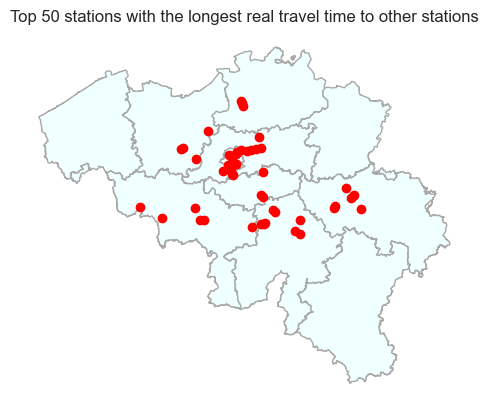

In [156]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_real.sort_values(by = "Real_travel_time").head(50)["longitude"], mean_difference_real.sort_values(by = "Real_travel_time").head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 50 stations with the longest real travel time to other stations" )
plt.show()

In [158]:
mean_difference_planned = mean_difference_planned.merge(stations, left_on ="Name of the stop", right_on = "name")

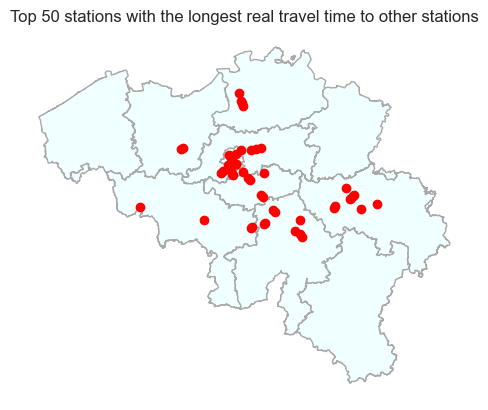

In [159]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_planned.sort_values(by = "Planned_travel_time").head(50)["longitude"], mean_difference_planned.sort_values(by = "Planned_travel_time").head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 50 stations with the planned travel time to other stations" )
plt.show()

If we look at the 20 stations with the highest travel time to other stations, we can see they are again stations that are close to the borders.

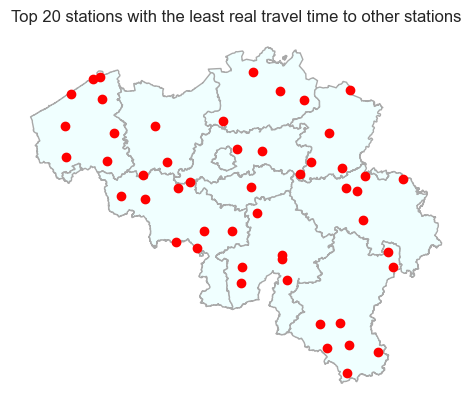

In [172]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(mean_difference_real.sort_values(by = "Real_travel_time", ascending = False).head(50)["longitude"], mean_difference_real.sort_values(by = "Real_travel_time", ascending = False).head(50)["latitude"], color = "red", zorder = 3)
ax.axis('off')
plt.title("Top 20 stations with the least real travel time to other stations" )
plt.show()

In [173]:
mean_difference_real["Real_travel_time"].describe()

count    554.000000
mean       4.024080
std        2.807689
min        1.028040
25%        2.394955
50%        3.294620
75%        4.986452
max       41.656944
Name: Real_travel_time, dtype: float64

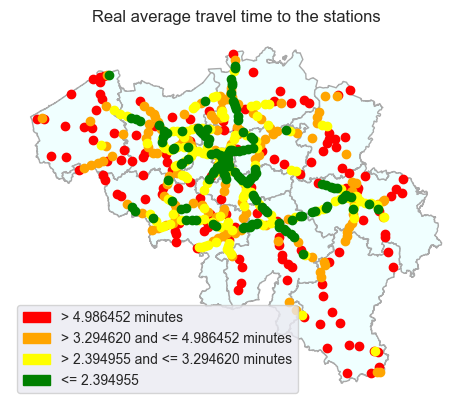

In [175]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
df = mean_difference_real.sort_values(by = "Real_travel_time", ascending = False)
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
ax.scatter(df[df["Real_travel_time"] > 4.986452]["longitude"], df[df["Real_travel_time"] > 4.986452]["latitude"], color = "red", zorder = 3)
ax.scatter(df[ (df["Real_travel_time"] > 3.294620 )& (df["Real_travel_time"] <=4.986452)  ]["longitude"], df[(df["Real_travel_time"] > 3.294620 )& (df["Real_travel_time"] <=4.986452) ]["latitude"], color = "orange", zorder = 3)

ax.scatter(df[ (df["Real_travel_time"] > 2.394955 )& (df["Real_travel_time"] <=3.294620)  ]["longitude"], df[(df["Real_travel_time"] > 2.394955 )& (df["Real_travel_time"] <=3.294620) ]["latitude"], color = "yellow", zorder = 3)

ax.scatter(df[df["Real_travel_time"] <2.394955]["longitude"], df[df["Real_travel_time"] < 2.394955]["latitude"], color = "green", zorder = 3)
red_patch = mpatches.Patch(color='red', label='> 4.986452 minutes')
orange_patch = mpatches.Patch(color='orange', label='> 3.294620 and <= 4.986452 minutes')
yellow_patch = mpatches.Patch(color='yellow', label='> 2.394955 and <= 3.294620 minutes')
green_patch = mpatches.Patch(color='green', label='<= 2.394955')
plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch])
plt.title("Real average travel time to the stations")
ax.axis('off')
plt.show()

We see that even though some red dots are as close to each other as some other green / yellow dots are, we can create some new train routes that connects the red dots so we can reduce the delay time.

# From here on we will do some extra analysis

# Does the average travel time to a station influence the satisfaction score?

No correlation

In [182]:
satisfaction = satisfaction.merge(mean_difference_real, left_on = "station", right_on ="Name of the stop")
satisfaction["Avg Satisfaction"].corr(satisfaction["Real_travel_time"])

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_81409/621803847.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'country-code_y_x', 'avg_stop_times_x_x', 'official_transfer_time_y_x', 'latitude_x_x', 'name_x_x', 'name_y_x', 'avg_stop_times_y_x', 'URI_x_x', 'country-code_x_x', 'latitude_y_x', 'longitude_y_x', 'URI_y_x', 'longitude_x_x', 'official_transfer_time_x_x'} in the result is deprecated and will raise a MergeError in a future version.
  satisfaction = satisfaction.merge(mean_difference_real, left_on = "station", right_on ="Name of the stop")


-0.005898278407620774

# Number of neighbors correlated with avg travel time?

no correlation

In [183]:
test = stations_distance.merge(mean_difference_real, left_on="station" , right_on = "Name of the stop")
test["neighbours_count"].corr(test["Real_travel_time"])

-0.0009709161045296162

# Avg travel time correlated with delay frequency?

In [185]:
stations_delay_percentage = trips[trips["Delay time"] > 0].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).reset_index().rename(columns={0: "Percentage of delays"})
stations_delay_percentage

Name of the stop  Percentage of delays
0                 aalst              0.818356
1      aalst-kerrebroek              0.607843
2                aalter              0.524378
3              aarschot              0.346072
4               aarsele              0.803738
..                  ...                   ...
615  zolder-kruissporen              0.565476
616            zonhoven              0.618182
617            zottegem              0.641283
618         zwijndrecht              0.935275
619         écaussinnes              0.879747

[620 rows x 2 columns]

In [186]:
test1 = mean_difference_real.merge(stations_delay_percentage, left_on = "name", right_on = "Name of the stop")
test1

Name of the stop_x  Real_travel_time      URI_x            name_x  \
0                aalst          6.381033  008895000             aalst   
1     aalst-kerrebroek          3.469594  008895125  aalst-kerrebroek   
2               aalter          2.608499  008891140            aalter   
3             aarschot          4.409830  008833209          aarschot   
4              aarsele          4.628193  008892288           aarsele   
..                 ...               ...        ...               ...   
549             zolder          3.076280  008832250            zolder   
550           zonhoven          7.313551  008832334          zonhoven   
551           zottegem          5.164172  008895208          zottegem   
552        zwijndrecht          4.587436  008894821       zwijndrecht   
553        écaussinnes          4.789765  008883212       écaussinnes   

    country-code_x  longitude_x  latitude_x  avg_stop_times_x  \
0               be     4.039653   50.942813        157.425373   
1               be     4.024407   50.948377          7.731343   
2               be     3.447848   51.092295        188.276119   
3               be     4.824043   50.984406        171.664179   
4               be     3.418363   50.984460         37.365672   
..             ...          ...         ...               ...   
549             be     5.329900   51.033548         30.910448   
550             be     5.348815   50.989557         30.910448   
551             be     3.814410   50.869102        161.223881   
552             be     4.329780   51.214108        150.514925   
553             be     4.156639   50.562390         60.044776   

     official_transfer_time_x      URI_y  ... official_transfer_time_y  \
0                       300.0  008895000  ...                    300.0   
1                       300.0  008895125  ...                    300.0   
2                       240.0  008891140  ...                    240.0   
3                       240.0  008833209  ...                    240.0   
4                       300.0  008892288  ...                    300.0   
..                        ...        ...  ...                      ...   
549                     300.0  008832250  ...                    300.0   
550                     300.0  008832334  ...                    300.0   
551                     240.0  008895208  ...                    240.0   
552                     300.0  008894821  ...                    300.0   
553                     300.0  008883212  ...                    300.0   

           URI              name  country-code  longitude   latitude  \
0    008895000             aalst            be   4.039653  50.942813   
1    008895125  aalst-kerrebroek            be   4.024407  50.948377   
2    008891140            aalter            be   3.447848  51.092295   
3    008833209          aarschot            be   4.824043  50.984406   
4    008892288           aarsele            be   3.418363  50.984460   
..         ...               ...           ...        ...        ...   
549  008832250            zolder            be   5.329900  51.033548   
550  008832334          zonhoven            be   5.348815  50.989557   
551  008895208          zottegem            be   3.814410  50.869102   
552  008894821       zwijndrecht            be   4.329780  51.214108   
553  008883212       écaussinnes            be   4.156639  50.562390   

    avg_stop_times official_transfer_time Name of the stop_y  \
0       157.425373                  300.0              aalst   
1         7.731343                  300.0   aalst-kerrebroek   
2       188.276119                  240.0             aalter   
3       171.664179                  240.0           aarschot   
4        37.365672                  300.0            aarsele   
..             ...                    ...                ...   
549      30.910448                  300.0             zolder   
550      30.910448                  300.0           zonhoven   
551     161.2238

No correlation

In [208]:
test1[["Real_travel_time","Percentage of delays"]]

Real_travel_time  Percentage of delays
0            6.381033              0.818356
1            3.469594              0.607843
2            2.608499              0.524378
3            4.409830              0.346072
4            4.628193              0.803738
..                ...                   ...
549          3.076280              0.508876
550          7.313551              0.618182
551          5.164172              0.641283
552          4.587436              0.935275
553          4.789765              0.879747

[554 rows x 2 columns]

In [187]:
test1["Real_travel_time"].corr(test1["Percentage of delays"])

0.011216026393646938

Text(0.5, 1.0, 'Percentage of delays per real travel time')

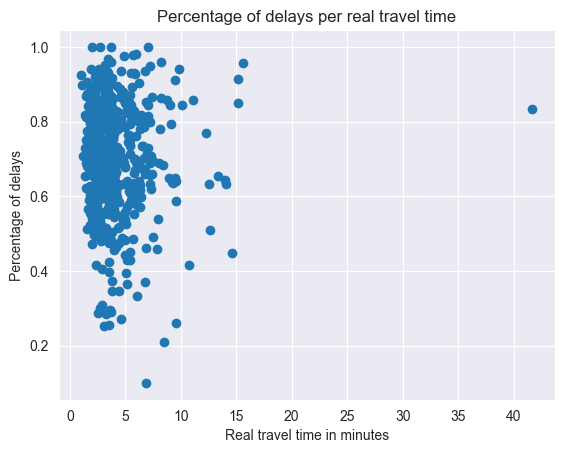

In [221]:
fig, ax = plt.subplots()
ax.scatter(test1["Real_travel_time"], test1["Percentage of delays"])
ax.set_xlabel("Real travel time in minutes")
ax.set_ylabel("Percentage of delays")
ax.set_title("Percentage of delays per real travel time")



# Avg travel time correlated with delay frequency?

In [217]:
mean_delay_df = trips.groupby("Name of the stop")["Delay time"].mean().reset_index()
mean_delay_df

Name of the stop  Delay time
0                 aalst  105.011094
1      aalst-kerrebroek   45.842857
2                aalter   91.692607
3              aarschot   63.912800
4               aarsele  130.149254
..                  ...         ...
622  zolder-kruissporen  111.341014
623            zonhoven  127.529954
624            zottegem   79.887064
625         zwijndrecht  125.429262
626         écaussinnes  152.316195

[627 rows x 2 columns]

In [218]:
test2 = mean_difference_real.merge(mean_delay_df, left_on = "name", right_on = "Name of the stop")
test2

Name of the stop_x  Real_travel_time      URI_x            name_x  \
0                aalst          6.381033  008895000             aalst   
1     aalst-kerrebroek          3.469594  008895125  aalst-kerrebroek   
2               aalter          2.608499  008891140            aalter   
3             aarschot          4.409830  008833209          aarschot   
4              aarsele          4.628193  008892288           aarsele   
..                 ...               ...        ...               ...   
549             zolder          3.076280  008832250            zolder   
550           zonhoven          7.313551  008832334          zonhoven   
551           zottegem          5.164172  008895208          zottegem   
552        zwijndrecht          4.587436  008894821       zwijndrecht   
553        écaussinnes          4.789765  008883212       écaussinnes   

    country-code_x  longitude_x  latitude_x  avg_stop_times_x  \
0               be     4.039653   50.942813        157.425373   
1               be     4.024407   50.948377          7.731343   
2               be     3.447848   51.092295        188.276119   
3               be     4.824043   50.984406        171.664179   
4               be     3.418363   50.984460         37.365672   
..             ...          ...         ...               ...   
549             be     5.329900   51.033548         30.910448   
550             be     5.348815   50.989557         30.910448   
551             be     3.814410   50.869102        161.223881   
552             be     4.329780   51.214108        150.514925   
553             be     4.156639   50.562390         60.044776   

     official_transfer_time_x      URI_y  ... official_transfer_time_y  \
0                       300.0  008895000  ...                    300.0   
1                       300.0  008895125  ...                    300.0   
2                       240.0  008891140  ...                    240.0   
3                       240.0  008833209  ...                    240.0   
4                       300.0  008892288  ...                    300.0   
..                        ...        ...  ...                      ...   
549                     300.0  008832250  ...                    300.0   
550                     300.0  008832334  ...                    300.0   
551                     240.0  008895208  ...                    240.0   
552                     300.0  008894821  ...                    300.0   
553                     300.0  008883212  ...                    300.0   

           URI              name  country-code  longitude   latitude  \
0    008895000             aalst            be   4.039653  50.942813   
1    008895125  aalst-kerrebroek            be   4.024407  50.948377   
2    008891140            aalter            be   3.447848  51.092295   
3    008833209          aarschot            be   4.824043  50.984406   
4    008892288           aarsele            be   3.418363  50.984460   
..         ...               ...           ...        ...        ...   
549  008832250            zolder            be   5.329900  51.033548   
550  008832334          zonhoven            be   5.348815  50.989557   
551  008895208          zottegem            be   3.814410  50.869102   
552  008894821       zwijndrecht            be   4.329780  51.214108   
553  008883212       écaussinnes            be   4.156639  50.562390   

    avg_stop_times official_transfer_time Name of the stop_y  Delay time  
0       157.425373                  300.0              aalst  105.011094  
1         7.731343                  300.0   aalst-kerrebroek   45.842857  
2       188.276119                  240.0             aalter   91.692607  
3       171.664179                  240.0           aarschot   63.912800  
4        37.365672                  300.0            aarsele  130.149254  
..             ...                    ...                ...         ...  
549      30.910448                  300.0             zolder  111.4

Also no correlation

In [191]:
test2["Real_travel_time"].corr(test2["Delay time"])

0.07915841541202516

Text(0.5, 1.0, 'Delay time per real travel time')

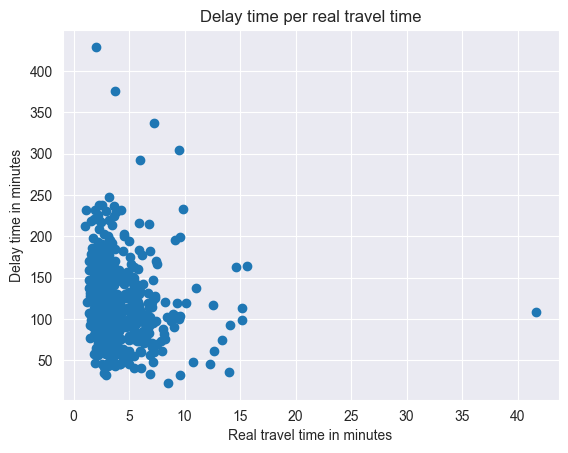

In [220]:
fig, ax = plt.subplots()
ax.scatter(test2["Real_travel_time"], test2["Delay time"])
ax.set_xlabel("Real travel time in minutes")
ax.set_ylabel("Delay time in minutes")
ax.set_title("Delay time per real travel time")

# Is number of neighbours / total length to neighbours correlated with the Delay frequency?

In [192]:
trips = data.full_trips
trips

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
0               0        2020-09-22            11      ICE         SNCB/NMBS   
1               1        2020-09-22            11      ICE         SNCB/NMBS   
2               2        2020-09-22            11      ICE         SNCB/NMBS   
3               3        2020-09-22            11      ICE         SNCB/NMBS   
4               4        2020-09-22            11      ICE         SNCB/NMBS   
...           ...               ...           ...      ...               ...   
72524       72524        2020-09-24         17200    EXTRA         SNCB/NMBS   
72525       72525        2020-09-24         17200    EXTRA         SNCB/NMBS   
72526       72526        2020-09-24         17200    EXTRA         SNCB/NMBS   
72527       72527        2020-09-24         17301    EXTRA         SNCB/NMBS   
72528       72528        2020-09-24         17301    EXTRA         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
0                      36N  2020-09-22 06:31:22    2020-09-22 06:33:27   
1                      36N  2020-09-22 06:36:23    2020-09-22 06:36:23   
2                      36N  2020-09-22 06:37:44    2020-09-22 06:37:44   
3                      36N  2020-09-22 06:38:39    2020-09-22 06:38:39   
4                      36N  2020-09-22 06:39:47    2020-09-22 06:39:47   
...                    ...                  ...                    ...   
72524                  130  2020-09-24 17:20:23    2020-09-24 17:20:23   
72525                  154  2020-09-24 17:27:14    2020-09-24 17:27:14   
72526                  NaN  2020-09-24 17:33:22                    NaT   
72527                  140  2020-09-24 18:57:01    2020-09-24 18:58:04   
72528                  140  2020-09-24 19:29:57    2020-09-24 19:29:57   

      Time of planned arrival Time of planned departure  \
0         2020-09-22 06:31:00       2020-09-22 06:33:00   
1         2020-09-22 06:36:00       2020-09-22 06:36:00   
2         2020-09-22 06:37:00       2020-09-22 06:37:00   
3         2020-09-22 06:38:00       2020-09-22 06:38:00   
4         2020-09-22 06:40:00       2020-09-22 06:40:00   
...                       ...                       ...   
72524     2020-09-24 17:05:00       2020-09-24 17:05:00   
72525     2020-09-24 17:17:00       2020-09-24 17:17:00   
72526     2020-09-24 17:20:00                       NaT   
72527     2020-09-24 18:55:00       2020-09-24 18:56:00   
72528     2020-09-24 19:26:00       2020-09-24 19:26:00   

                          Direction of relation              Name of the stop  \
0      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF  brussel-noord/bruxelles-nord   
1      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF         schaarbeek/schaerbeek   
2      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF          haren-sud/haren-zuid   
3      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF                        diegem   
4      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF                    kortenberg   
...                                         ...                           ...   
72524                                       NaN                         ronet   
72525                                       NaN                namur-herbatte   
72526                                       NaN                        jambes   
72527                                       NaN               charleroi-ouest   
72528                                       NaN                          faux   

      Railway of arrival Date of planned arrival Date of planned departure  \
0                    0/1              2020-09-22                2020-09-22   
1                    36N              2020-09-22                2020-09-22   
2                    36N              2020-09-22                2020-09-22   
3                    36N              2020-09-22                2020-09-22   
4                    36N              2020-09-22                2020-09-22   
...    

In [193]:
stations_delay_percentage = trips[trips["Delay time"] > 0].groupby("Name of the stop").size().div(trips.groupby("Name of the stop").size()).reset_index().rename(columns={0: "Percentage of delays"})
stations_delay_percentage

Name of the stop  Percentage of delays
0                 aalst              0.587163
1      aalst-kerrebroek              0.642857
2                aalter              0.531518
3              aarschot              0.340000
4               aarsele              0.787313
..                  ...                   ...
622  zolder-kruissporen              0.548387
623            zonhoven              0.622120
624            zottegem              0.558522
625         zwijndrecht              0.941959
626         écaussinnes              0.871465

[627 rows x 2 columns]

In [194]:
merged_df = stations_distance.merge(stations_delay_percentage, left_on = "station", right_on = "Name of the stop")
merged_df

station  total_length  neighbours_count  length/count Name of the stop  \
0       luttre     11.716203                 3      3.905401           luttre   
1       thulin      6.082822                 2      3.041411           thulin   
2      hasselt     37.297193                 5      7.459439          hasselt   
3      ezemaal      9.546610                 2      4.773305          ezemaal   
4        gouvy     11.424757                 1     11.424757            gouvy   
..         ...           ...               ...           ...              ...   
404     natoye      7.889648                 2      3.944824           natoye   
405   de panne      3.669362                 1      3.669362         de panne   
406     hamont      8.684387                 1      8.684387           hamont   
407   oostende     21.897862                 1     21.897862         oostende   
408  poperinge     10.134972                 1     10.134972        poperinge   

     Percentage of delays  
0                0.515046  
1                0.811159  
2                0.451339  
3                0.638400  
4                0.159204  
..                    ...  
404              0.776213  
405              0.377863  
406              0.226519  
407              0.284277  
408              0.239726  

[409 rows x 6 columns]

no correlation between either length or neighboars and the percentage of delays.

In [195]:
merged_df["total_length"].corr(merged_df["Percentage of delays"])

-0.08600566197830455

In [196]:
merged_df["neighbours_count"].corr(merged_df["Percentage of delays"])

0.022275839784055958

A little bit of negative correlation

In [197]:
merged_df["length/count"].corr(merged_df["Percentage of delays"])

-0.18516488770882863

In [198]:
stations_delay_time = trips.groupby("Name of the stop")["Delay time"].mean().reset_index().rename(columns={"Delay time": "Average delay time"})
stations_delay_time

Name of the stop  Average delay time
0                 aalst          105.011094
1      aalst-kerrebroek           45.842857
2                aalter           91.692607
3              aarschot           63.912800
4               aarsele          130.149254
..                  ...                 ...
622  zolder-kruissporen          111.341014
623            zonhoven          127.529954
624            zottegem           79.887064
625         zwijndrecht          125.429262
626         écaussinnes          152.316195

[627 rows x 2 columns]

In [199]:
merged_df2 = stations_distance.merge(stations_delay_time, left_on = "station", right_on = "Name of the stop")
merged_df2

station  total_length  neighbours_count  length/count Name of the stop  \
0       luttre     11.716203                 3      3.905401           luttre   
1       thulin      6.082822                 2      3.041411           thulin   
2      hasselt     37.297193                 5      7.459439          hasselt   
3      ezemaal      9.546610                 2      4.773305          ezemaal   
4        gouvy     11.424757                 1     11.424757            gouvy   
..         ...           ...               ...           ...              ...   
404     natoye      7.889648                 2      3.944824           natoye   
405   de panne      3.669362                 1      3.669362         de panne   
406     hamont      8.684387                 1      8.684387           hamont   
407   oostende     21.897862                 1     21.897862         oostende   
408  poperinge     10.134972                 1     10.134972        poperinge   

     Average delay time  
0            127.586806  
1             85.699571  
2            107.139778  
3            132.267200  
4             22.741294  
..                  ...  
404          168.034429  
405           84.038168  
406           47.917127  
407           61.694340  
408           56.318493  

[409 rows x 6 columns]

Also no correlation with the average delay time.

In [200]:
merged_df2["total_length"].corr(merged_df2["Average delay time"])

-0.0005433012367597784

In [201]:
merged_df2["neighbours_count"].corr(merged_df2["Average delay time"])

0.0358903119332686

In [202]:
merged_df2["length/count"].corr(merged_df2["Average delay time"])

-0.025464423352453074

In [203]:
stations = data.stations
stations["name"]= stations["name"].str.lower()

In [204]:
merged_df3 = stations_delay_time.merge(stations, left_on = "Name of the stop", right_on = "name").merge(stations_delay_percentage,left_on = "Name of the stop", right_on = "Name of the stop")
merged_df3

Name of the stop  Average delay time        URI              name  \
0               aalst          105.011094  008895000             aalst   
1    aalst-kerrebroek           45.842857  008895125  aalst-kerrebroek   
2              aalter           91.692607  008891140            aalter   
3            aarschot           63.912800  008833209          aarschot   
4             aarsele          130.149254  008892288           aarsele   
..                ...                 ...        ...               ...   
551            zolder          111.460829  008832250            zolder   
552          zonhoven          127.529954  008832334          zonhoven   
553          zottegem           79.887064  008895208          zottegem   
554       zwijndrecht          125.429262  008894821       zwijndrecht   
555       écaussinnes          152.316195  008883212       écaussinnes   

    country-code  longitude   latitude  avg_stop_times  \
0             be   4.039653  50.942813      157.425373   
1             be   4.024407  50.948377        7.731343   
2             be   3.447848  51.092295      188.276119   
3             be   4.824043  50.984406      171.664179   
4             be   3.418363  50.984460       37.365672   
..           ...        ...        ...             ...   
551           be   5.329900  51.033548       30.910448   
552           be   5.348815  50.989557       30.910448   
553           be   3.814410  50.869102      161.223881   
554           be   4.329780  51.214108      150.514925   
555           be   4.156639  50.562390       60.044776   

     official_transfer_time  Percentage of delays  
0                     300.0              0.587163  
1                     300.0              0.642857  
2                     240.0              0.531518  
3                     240.0              0.340000  
4                     300.0              0.787313  
..                      ...                   ...  
551                   300.0              0.525346  
552                   300.0              0.622120  
553                   240.0              0.558522  
554                   300.0              0.941959  
555                   300.0              0.871465  

[556 rows x 10 columns]

# Plot the average delay per station on a map

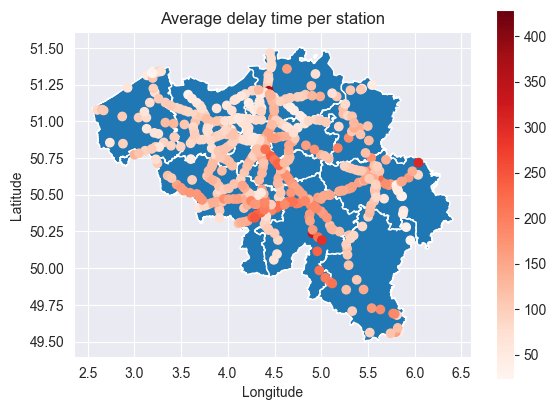

In [205]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)
sc =ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Average delay time"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Average delay time per station")
plt.show()



# Plot the percentage of delays per station on a map

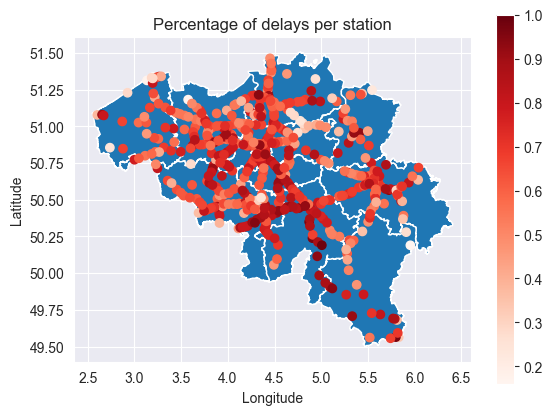

In [206]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.provinces.plot(ax=ax)

sc = ax.scatter(merged_df3["longitude"], merged_df3["latitude"], c = merged_df3["Percentage of delays"], cmap = "Reds")
cbar = fig.colorbar(sc)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percentage of delays per station")
plt.show()
